In [2]:
import sys
from pathlib import Path

# Add project root (the folder that contains "src" and "scripts")
ROOT = Path.cwd().parent
sys.path.append(str(ROOT))
print("Project root added to path:", ROOT)

Project root added to path: /workspaces/pile-settlement-model


In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from scripts.run_models import main
from src.config import RESULTS_DIR, FIGURES_DIR

In [4]:
# Run models
main()

Loading and preparing data...
Train target shape: (402, 1)
Train target columns: ['S-mm']
Renamed single column to 'S-mm'
Final train columns: ['EA or EA effec (MN)', 'A bot-Cm2', 'Perimeter-Cm', 'L-m', 'L efec.-m', 'qc1-Mpa', 'fs1-Kpa', 'qc2-Mpa', 'fs2-Kpa', 'qc3-Mpa', 'fs3-kpa', 'qc4-Mpa', 'fs4-Kpa', 'qc5-Mpa', 'fs5-Kpa', 'qc-bot-Mpa', 'P-KN', 'Type of test_CRP', 'Type of test_ML', 'Type of pile_Composite', 'Type of pile_Concrete', 'Type of pile_Steel', 'Type of instalation_Bored', 'Type of instalation_Driven', 'End of Pile_Closed', 'End of Pile_Open', 'S-mm']
Target column 'S-mm' exists in final train: True
Training data: (402, 26)
Test data: (53, 26)
Validation data: (44, 26)

=== Sparse Linear Models for Feature Selection (Ridge, Lasso) ===

OLS Linear Regression Results:
  RMSE: 9.2628
  MAE: 7.1352
  R²: -0.6879

Ridge Regression (alpha = 10.0) Results:
  RMSE: 8.8079
  MAE: 6.8872
  R²: -0.5262

Lasso Regression (alpha = 0.1) Results:
  RMSE: 8.7022
  MAE: 6.7649
  R²: -0.4898


In [5]:
results_path = RESULTS_DIR / "model_results.csv"
preds_path = RESULTS_DIR / "model_predictions.csv"
gp_path = RESULTS_DIR / "gp_predictions.csv"
xgb_gp_path = RESULTS_DIR / "xgb_gp_residuals_predictions.csv"

# Load core model metrics
results = pd.read_csv(results_path, index_col = "Model")
print("\n=== Model Evaluation Summary ===")
display(results)

# Load standard predictions
print("\n=== Sample Predictions (Main Models) ===")
preds = pd.read_csv(preds_path)
display(preds.head())

# Load GP predictions with uncertainty
if gp_path.exists():
    print("\n=== Gaussian Process Predictions (with Uncertainty Intervals) ===")
    gp_preds = pd.read_csv(gp_path)
    display(gp_preds.head())
else:
    print("\nNo Gaussian Process predictions file found.")

# Load and preview XGB + GP residual predictions
if xgb_gp_path.exists():
    print("\n=== XGBoost + GP Residual Predictions (with Uncertainty Intervals) ===")
    xgb_gp_preds = pd.read_csv(xgb_gp_path)
    display(xgb_gp_preds.head())
else:
    print("No XGB+GP residual predictions file found.")



=== Model Evaluation Summary ===


,RMSE,MAE,R2,MSE
Model,,,,
OLS,9.262754,7.135160,-0.687875,85.798608
Ridge,8.807861,6.887174,-0.526163,77.578410
Lasso,8.702179,6.764909,-0.489760,75.727927
PCA_90%_Linear,7.673476,6.029213,-0.158362,58.882238
PCA_95%_Linear,8.348116,6.519866,-0.370999,69.691043
PCA_99%_Linear,9.230198,7.404739,-0.676031,85.196552
Best_PCA_Linear,7.673476,6.029213,-0.158362,58.882238
PCA_SVR_rbf,7.277310,4.386585,-0.041842,52.959247
PCA_SVR_poly,7.445162,4.471476,-0.090457,55.430438



=== Sample Predictions (Main Models) ===


,y_true,OLS,Ridge,Lasso,PCA_90%_Linear,PCA_95%_Linear,PCA_99%_Linear,Best_PCA_Linear,PCA_SVR_rbf,PCA_SVR_poly,PCA_SVR_sigmoid,PCA_XGBoost
0,0.00,18.054341,16.634847,15.656042,9.474785,14.327659,16.855522,9.474785,5.418248,5.551753,2.602922,4.109655
1,8.75,19.614483,17.987237,17.046231,10.215099,15.151605,18.250561,10.215099,6.421458,6.162985,2.764507,26.161491
2,2.39,-7.406443,-3.219481,-3.387557,12.009772,10.929110,-3.747059,12.009772,2.450938,2.521258,14.543994,5.830885
3,1.44,6.797937,9.340370,6.849131,5.784443,8.219613,9.723631,5.784443,5.635011,4.955350,3.988654,1.278613
4,1.77,25.823184,19.122259,19.389335,14.053641,13.763466,16.007207,14.053641,8.567279,8.679589,3.930024,3.645694



=== Gaussian Process Predictions (with Uncertainty Intervals) ===


,y_true,y_pred_mean,y_pred_lower,y_pred_upper
0,0.00,3.896643,-1.094219,8.887507
1,8.75,14.405124,10.084129,18.726118
2,2.39,4.260681,-0.765449,9.286811
3,1.44,3.228744,-1.530223,7.987711
4,1.77,2.688620,-1.551743,6.928984



=== XGBoost + GP Residual Predictions (with Uncertainty Intervals) ===


,y_true,y_pred_mean,y_pred_lower,y_pred_upper
0,0.00,3.311334,1.508370,6.410230
1,8.75,22.381740,12.615942,39.151886
2,2.39,3.783149,1.744150,7.337197
3,1.44,0.973169,0.153176,2.376235
4,1.77,3.293963,1.553395,6.221022


In [6]:
# Load standard predictions
print("\n=== Sample Predictions (Main Models) ===")
preds = pd.read_csv(preds_path)

# Select only desired columns
cols_to_show = ["y_true", "OLS", "Best_PCA_Linear", "PCA_SVR_rbf", "PCA_SVR_poly", "PCA_SVR_sigmoid"]
cols_present = [c for c in cols_to_show if c in preds.columns]

display(preds[cols_present].head())


=== Sample Predictions (Main Models) ===


,y_true,OLS,Best_PCA_Linear,PCA_SVR_rbf,PCA_SVR_poly,PCA_SVR_sigmoid
0,0.00,18.054341,9.474785,5.418248,5.551753,2.602922
1,8.75,19.614483,10.215099,6.421458,6.162985,2.764507
2,2.39,-7.406443,12.009772,2.450938,2.521258,14.543994
3,1.44,6.797937,5.784443,5.635011,4.955350,3.988654
4,1.77,25.823184,14.053641,8.567279,8.679589,3.930024


Loaded cross-validation results from: /workspaces/pile-settlement-model/results/cv_results.csv


,Model,Metric,Mean,Std
0,PCA+Linear,SQUARED_ERROR,16.002295,2.216143
1,PCA+Linear,R2,0.082447,0.029517
2,PCA+Linear,ABSOLUTE_ERROR,9.959601,0.762664
3,SVR (RBF),SQUARED_ERROR,16.225765,3.175518
4,SVR (RBF),R2,0.064930,0.051144
5,SVR (RBF),ABSOLUTE_ERROR,7.621835,1.410187
6,XGBoost,SQUARED_ERROR,12.121786,2.055400
7,XGBoost,R2,0.431103,0.139269
8,XGBoost,ABSOLUTE_ERROR,6.084646,1.116542



=== Cross-Validation Summary ===


,Model,RMSE_mean,RMSE_std,R2_mean,R2_std
0,PCA+Linear,16.002295,2.216143,0.082447,0.029517
1,SVR (RBF),16.225765,3.175518,0.064930,0.051144
2,XGBoost,12.121786,2.055400,0.431103,0.139269


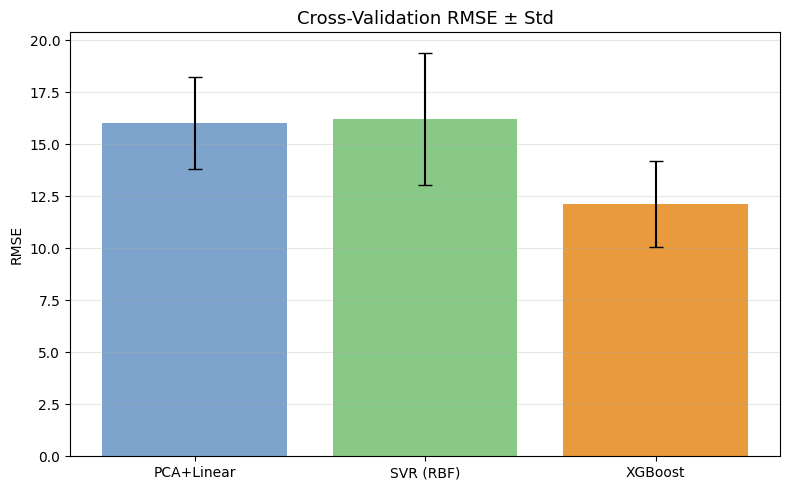

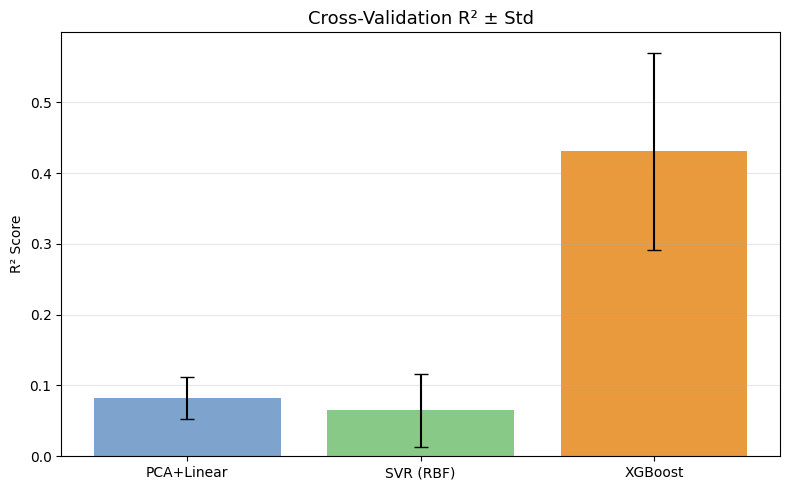

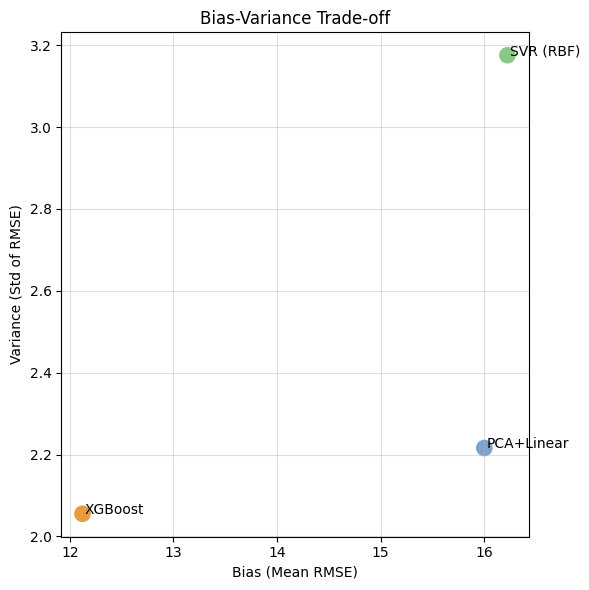

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load or prepare cross-validation results

# Try to load from file if available
cv_path = RESULTS_DIR / "cv_results.csv"
if not cv_path.exists():
    raise FileNotFoundError("Cross-validation results file not found. Run cross_validate_model() first.")

# Read CSV and assign proper column names
cv_df = pd.read_csv(cv_path, header = 0)
if cv_df.columns[0].startswith("Unnamed"):
    cv_df.columns = ["Model", "Metric", "Mean", "Std"]

print(f"Loaded cross-validation results from: {cv_path}")
display(cv_df)

# Pivot table to access Mean and Std easily
cv_pivot = cv_df.pivot(index = "Metric", columns = "Model", values = "Mean")
cv_std_pivot = cv_df.pivot(index = "Metric", columns = "Model", values = "Std")

# Normalize metric names
metric_map = {
    "SQUARED_ERROR": "RMSE",
    "R2": "R2",
    "ABSOLUTE_ERROR": "MAE"
}
cv_pivot.rename(index=metric_map, inplace=True)
cv_std_pivot.rename(index=metric_map, inplace=True)

# Select models for comparison
models = [m for m in ["PCA+Linear", "SVR (RBF)", "XGBoost"] if m in cv_pivot.columns]

# Extract values
rmse_means = [cv_pivot.at["RMSE", m] if "RMSE" in cv_pivot.index else np.nan for m in models]
r2_means   = [cv_pivot.at["R2", m] if "R2" in cv_pivot.index else np.nan for m in models]
rmse_stds  = [cv_std_pivot.at["RMSE", m] if "RMSE" in cv_std_pivot.index else np.nan for m in models]
r2_stds    = [cv_std_pivot.at["R2", m] if "R2" in cv_std_pivot.index else np.nan for m in models]

# Display summary
cv_summary = pd.DataFrame({
    "Model": models,
    "RMSE_mean": rmse_means,
    "RMSE_std": rmse_stds,
    "R2_mean": r2_means,
    "R2_std": r2_stds
})
print("\n=== Cross-Validation Summary ===")
display(cv_summary)

# Visualization 1: RMSE ± Std
plt.figure(figsize = (8, 5))
plt.bar(models, rmse_means, yerr = rmse_stds, capsize = 5, color = ["#7EA3CC", "#89C987", "#E89A3C"])
plt.title("Cross-Validation RMSE ± Std", fontsize = 13)
plt.ylabel("RMSE")
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()

# Visualization 2: R² ± Std
plt.figure(figsize = (8, 5))
plt.bar(models, r2_means, yerr = r2_stds, capsize = 5, color = ["#7EA3CC", "#89C987", "#E89A3C"])
plt.title("Cross-Validation R² ± Std", fontsize = 13)
plt.ylabel("R² Score")
plt.grid(axis = "y", alpha = 0.3)
plt.tight_layout()
plt.show()

# Visualization 3: Bias–Variance Trade-off
# RMSE mean as proxy for bias, RMSE std as proxy for variance
plt.figure(figsize = (6, 6))
plt.scatter(rmse_means, rmse_stds, s = 120, c = ["#7EA3CC", "#89C987", "#E89A3C"])
for i, model in enumerate(models):
    plt.text(rmse_means[i] + 0.02, rmse_stds[i], model, fontsize = 10)
plt.xlabel("Bias (Mean RMSE)")
plt.ylabel("Variance (Std of RMSE)")
plt.title("Bias-Variance Trade-off")
plt.grid(True, alpha = 0.4)
plt.tight_layout()
plt.show()


In [8]:
"""
# Show saved figures
from IPython.display import Image, display

print("\nSaved figures:")
for fig_file in sorted(FIGURES_DIR.glob("*.png")):
    print(f"- {fig_file.name}")
    display(Image(filename = fig_file))
"""

'\n# Show saved figures\nfrom IPython.display import Image, display\n\nprint("\nSaved figures:")\nfor fig_file in sorted(FIGURES_DIR.glob("*.png")):\n    print(f"- {fig_file.name}")\n    display(Image(filename = fig_file))\n'